**Importing necessary libraries**

In [1]:
from google.colab import files
import time
import os
import glob
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.core.pylabtools import figsize

import torch
import torchvision
from torchvision import datasets, transforms,models
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torch.nn.modules.loss import BCEWithLogitsLoss
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt 


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


**Structuring the dataset -- This is a one time thing. **

In [3]:
# ALL DONE



# !mkdir -p /content/drive/MyDrive/Machine\ Learning\ project/resnet/data/
dat_dir = '/content/drive/MyDrive/Machine Learning project/resnet/data'
working_dir = '/content/drive/MyDrive/Machine Learning project/resnet'
dataset_dir = '/content/drive/MyDrive/Machine Learning project/Balanced_training_set/Balanced'

training_dir = os.path.join(dat_dir, "training")
# if not os.path.isdir(training_dir):
#   os.mkdir(training_dir)

CE_training_dir = os.path.join(training_dir,"CE")
# if not os.path.isdir(CE_training_dir):
#   os.mkdir(CE_training_dir)

LAA_training_dir = os.path.join(training_dir,"LAA")
# if not os.path.isdir(LAA_training_dir):
#   os.mkdir(LAA_training_dir)

testing_dir = os.path.join(dat_dir, "testing")
# if not os.path.isdir(testing_dir):
#   os.mkdir(testing_dir)

CE_testing_dir = os.path.join(testing_dir,"CE")
# if not os.path.isdir(CE_testing_dir):
#   os.mkdir(CE_testing_dir)

LAA_testing_dir = os.path.join(testing_dir,"LAA")
# if not os.path.isdir(LAA_testing_dir):
#   os.mkdir(LAA_testing_dir)




Next Step is to populate the train and the test folders with the respective data

In [ ]:
# csv_path = os.path.join(dataset_dir,"balanced_training_data.csv")
# df_train = pd.read_csv(csv_path)
# df_train.dropna(how="all", inplace=True)
# # display(df_train.head())
# # 2086523
# i = 0 
# for _, row in df_train.iterrows():
#   p_img = os.path.join(dataset_dir, "balanced_train", f"{row['image_id']}")
#   # print(p_img)
#   if not os.path.isfile(p_img):
#     print(f"missing: {p_img}")
#     continue
#   # shutil.copy(p_img, os.path.join(training_dir, row["label"], f"{row['image_id']}"))
#   i+=1
#   # print(f'{i/2086*100 } %  training data copied')

# csv_path = os.path.join(dataset_dir,"balanced_testing_data.csv")
# df_test = pd.read_csv(csv_path)
# df_test.dropna(how="all", inplace=True)
# i = 0
# for _, row in df_test.iterrows():
#   p_img = os.path.join(dataset_dir, "balanced_test", f"{row['image_id']}")
#   # print(p_img)
#   if not os.path.isfile(p_img):
#     print(f"missing: {p_img}")
#     continue
#   # shutil.copy(p_img, os.path.join(testing_dir, row["label"], f"{row['image_id']}"))
#   i+=1
#   # print(f'{i/523*100 } %  testing data copied')



In [4]:
count = 0
for root_dir, cur_dir, files in os.walk(training_dir):
    count += len(files)
print('training examples :', count)
count = 0
for root_dir, cur_dir, files in os.walk(testing_dir):
    count += len(files)
print('testing examples :', count)

training examples : 2085
testing examples : 522


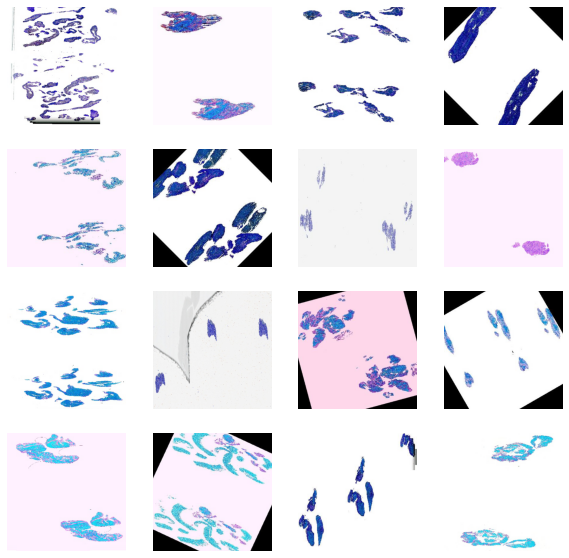

In [5]:
samples_CE = [os.path.join(CE_training_dir,np.random.choice(os.listdir(CE_training_dir),1)[0]) for _ in range(8)]
samples_LAA = [os.path.join(LAA_training_dir,np.random.choice(os.listdir(LAA_training_dir),1)[0]) for _ in range(8)]

nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize = (10,10))
ax = ax.flatten()

for i in range(nrows*ncols):
  if i < 8:
    pic = plt.imread(samples_CE[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
  else:
    pic = plt.imread(samples_LAA[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
plt.show()

In [16]:
traindir = training_dir
testdir = testing_dir

train_transforms = transforms.Compose([
                                        transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        torchvision.transforms.Normalize(
                                          mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225],
                                          ),
                                          ]
                                      )
test_transforms = transforms.Compose([
                                        transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        torchvision.transforms.Normalize(
                                          mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225],
                                          ),
                                          ]
                                      )

train_data = datasets.ImageFolder(traindir,transform=train_transforms)
test_data = datasets.ImageFolder(testdir,transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size=4)
testloader = torch.utils.data.DataLoader(test_data, shuffle = True, batch_size=4)
# for _ in trainloader:
#   print(_)
#   break


In [15]:
%%time
train_y = train_df["Y"]
train_df = None
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,test_size=0.2)
# train_x,test_x,train_y,test_y=train_test_split(train_data[0],train_data[1],test_size=0.2) // traindata[0] nahi - row, column dedo isko

import math
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, Callback, ReduceLROnPlateau 


#lrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=8, min_lr=0.0001) # not doing anything meaningful for us

earstop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 16)


history = model.fit(
    train_x,
    train_y,
    epochs = 1000,
    batch_size=32,
    validation_data = (test_x,test_y),
    shuffle=True,
    verbose = 1,
    callbacks = [PlotLearning(), earstop] #lrate]

SyntaxError: ignored

In [ ]:
train_x = []

for i in train_data:
  train_x.append(train_data[i][0])

TypeError: ignored

In [ ]:
(train_data[0])

(tensor([[[2.2489, 2.2318, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2318,  ..., 2.2489, 2.2489, 2.2489],
          [2.2147, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],
 
         [[2.4286, 2.4111, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4111,  ..., 2.4286, 2.4286, 2.4286],
          [2.3936, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],
 
         [[2.6400, 2.6226, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6226,  ..., 2.6400, 2.6400, 2.6400],
          [2.6051, 2.6400, 2.6400,  ...,

In [ ]:
trainloader

In [ ]:
traindir

'/content/drive/MyDrive/Machine Learning project/resnet/data/training'

In [ ]:
type(train_data[0])

tuple

In [26]:
def make_train_step(model, optimizer, loss_fn):
  def train_step(x,y):
    #make prediction
    yhat = model(x)
    #enter train mode
    model.train()
    #compute loss
    loss = loss_fn(yhat,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #optimizer.cleargrads()

    return loss
  return train_step


In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.resnet18(ResNet18_Weights.DEFAULT)
# print(model)
print(model)

for params in model.parameters():
  params.requires_grad_ = False

#add a new final layer
nr_filters = model.fc.in_features  #number of input features of last layer
model.fc = nn.Linear(nr_filters, )
print(device)
model = model.to(device)

loss_fn = BCEWithLogitsLoss() #binary cross entropy with sigmoid, so no need to use sigmoid in the model

#optimizer
optimizer = torch.optim.Adam(model.fc.parameters()) 

#train step
train_step = make_train_step(model, optimizer, loss_fn)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
# %%capture
# !pip install tqdm
from tqdm import tqdm


losses = []
val_losses = []

epoch_train_losses = []
epoch_test_losses = []

n_epochs = 20
early_stopping_tolerance = 3
early_stopping_threshold = 0.03

for epoch in range(n_epochs):
  print(f"EPOCH: {epoch+1}")
  epoch_loss = 0
  for i ,data in tqdm(enumerate(trainloader), total = len(trainloader)): #iterate ove batches
    x_batch , y_batch = data
    x_batch = x_batch.to(device) #move to gpu
    y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
    y_batch = y_batch.to(device) #move to gpu


    loss = train_step(x_batch, y_batch)
    epoch_loss += loss/len(trainloader)
    losses.append(loss)
    
  epoch_train_losses.append(epoch_loss.item())
  print('\nEpoch : {}, train loss : {}'.format(epoch+1,epoch_loss))

  # validation doesnt requires gradient
  with torch.no_grad():
    cum_loss = 0
    for x_batch, y_batch in testloader:
      
      x_batch = x_batch.to(device)
      y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
      y_batch = y_batch.to(device)

      #model to eval mode
      model.eval()

      yhat = model(x_batch)
      val_loss = loss_fn(yhat,y_batch)
      cum_loss += loss/len(testloader)
      val_losses.append(val_loss.item())


    epoch_test_losses.append(cum_loss.item())
    print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))  
    
    best_loss = min(epoch_test_losses)
    
    #save best model
    if cum_loss <= best_loss:
      best_model_wts = model.state_dict()
    
    #early stopping
    early_stopping_counter = 0
    if cum_loss > best_loss:
      early_stopping_counter +=1

    if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
      print("/nTerminating: early stopping")
      break #terminate training
    
#load best model
model.load_state_dict(best_model_wts)


EPOCH: 1


100%|██████████| 522/522 [00:21<00:00, 24.03it/s]



Epoch : 1, train loss : 0.6916531920433044
Epoch : 1, val loss : 0.7461997866630554
EPOCH: 2


100%|██████████| 522/522 [00:21<00:00, 24.43it/s]



Epoch : 2, train loss : 0.6739611625671387
Epoch : 2, val loss : 0.8618935346603394
EPOCH: 3


100%|██████████| 522/522 [00:21<00:00, 24.50it/s]



Epoch : 3, train loss : 0.6632473468780518
Epoch : 3, val loss : 0.8454645276069641
EPOCH: 4


100%|██████████| 522/522 [00:21<00:00, 24.64it/s]



Epoch : 4, train loss : 0.6486266851425171
Epoch : 4, val loss : 0.9144796133041382
EPOCH: 5


100%|██████████| 522/522 [00:20<00:00, 24.91it/s]



Epoch : 5, train loss : 0.6467806100845337
Epoch : 5, val loss : 1.1978309154510498
EPOCH: 6


100%|██████████| 522/522 [00:21<00:00, 23.79it/s]



Epoch : 6, train loss : 0.6174145936965942
Epoch : 6, val loss : 0.7336255311965942
EPOCH: 7


100%|██████████| 522/522 [00:20<00:00, 24.87it/s]



Epoch : 7, train loss : 0.6205153465270996
Epoch : 7, val loss : 0.33951297402381897
EPOCH: 8


100%|██████████| 522/522 [00:21<00:00, 24.72it/s]



Epoch : 8, train loss : 0.6048026084899902
Epoch : 8, val loss : 0.7828924655914307
EPOCH: 9


100%|██████████| 522/522 [00:21<00:00, 24.64it/s]



Epoch : 9, train loss : 0.5982392430305481
Epoch : 9, val loss : 0.31495460867881775
EPOCH: 10


100%|██████████| 522/522 [00:21<00:00, 24.59it/s]



Epoch : 10, train loss : 0.6028083562850952
Epoch : 10, val loss : 0.527667224407196
EPOCH: 11


100%|██████████| 522/522 [00:21<00:00, 24.41it/s]



Epoch : 11, train loss : 0.606677770614624
Epoch : 11, val loss : 1.3832966089248657
EPOCH: 12


100%|██████████| 522/522 [00:22<00:00, 22.93it/s]



Epoch : 12, train loss : 0.5964779257774353
Epoch : 12, val loss : 1.3789253234863281
EPOCH: 13


100%|██████████| 522/522 [00:21<00:00, 24.54it/s]



Epoch : 13, train loss : 0.5950416326522827
Epoch : 13, val loss : 0.3561742901802063
EPOCH: 14


100%|██████████| 522/522 [00:21<00:00, 24.56it/s]



Epoch : 14, train loss : 0.5863367915153503
Epoch : 14, val loss : 0.6281470060348511
EPOCH: 15


100%|██████████| 522/522 [00:21<00:00, 24.43it/s]



Epoch : 15, train loss : 0.5880066156387329
Epoch : 15, val loss : 0.6420383453369141
EPOCH: 16


100%|██████████| 522/522 [00:21<00:00, 24.36it/s]



Epoch : 16, train loss : 0.5952280163764954
Epoch : 16, val loss : 0.2725606858730316
EPOCH: 17


100%|██████████| 522/522 [00:21<00:00, 24.61it/s]



Epoch : 17, train loss : 0.5808790922164917
Epoch : 17, val loss : 0.5374695062637329
EPOCH: 18


100%|██████████| 522/522 [00:21<00:00, 24.67it/s]



Epoch : 18, train loss : 0.5742167234420776
Epoch : 18, val loss : 0.6066405177116394
EPOCH: 19


100%|██████████| 522/522 [00:22<00:00, 23.68it/s]



Epoch : 19, train loss : 0.5707814693450928
Epoch : 19, val loss : 1.0439869165420532
EPOCH: 20


100%|██████████| 522/522 [00:21<00:00, 24.71it/s]



Epoch : 20, train loss : 0.5772490501403809
Epoch : 20, val loss : 0.6929088234901428


<All keys matched successfully>

In [53]:

torch.save(model.state_dict(), os.path.join(working_dir, "20_trained_weights"))


Actual: LAA (Desired score: 1)
Prediction : LAA (Score = 0.5719105005264282)


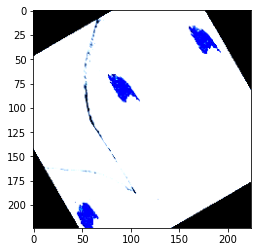

In [93]:
model = models.resnet18()
nr_filters = model.fc.in_features  #number of input features of last layer
model.fc = nn.Linear(nr_filters, 1)
model.load_state_dict(torch.load(os.path.join(working_dir, "20_trained_weights"),map_location=torch.device('cuda')))

def inference(test_data):
  idx = torch.randint(1, len(test_data), (1,))
  sample = torch.unsqueeze(test_data[idx][0], dim=0)
  labels = ["CE", "LAA"]
  print(f"Actual: {labels[test_data[idx][1]]} (Desired score: {test_data[idx][1]})")
  # print(torch.sigmoid(model(sample)).item())
  
  if torch.sigmoid(model(sample)) < 0.5:
    print(f"Prediction : CE (Score = {torch.sigmoid(model(sample)).item()})")
  else:
    print(f"Prediction : LAA (Score = {torch.sigmoid(model(sample)).item()})")


  plt.imshow(test_data[idx][0].permute(1, 2, 0))

inference(test_data)




Predicted: LAA(probability score: 0.6872290372848511)
Ground Truth: LAA, (Ground Truth score: 1)


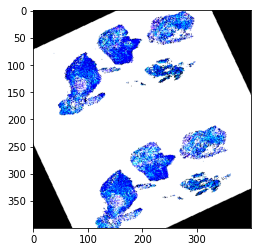

In [ ]:
# model_ = models.resnet18()

def demo(test_data):
  y_pred = list()
  y_test = list()
  i = np.random.randint(len(test_data))
  # print(test_data[i][0])
  sample = test_data[i]
  plt.imshow(sample[0].permute(1, 2, 0))
  labels = ["CE", "LAA"]
  flattened  = torch.unsqueeze(sample[0], dim=0).to(device)
  predicted_label = torch.sigmoid(model(flattened)).item()
  
  print(f"Predicted: {labels[round(predicted_label)]}(probability score: {predicted_label})\nGround Truth: {labels[sample[1]]}, (Ground Truth score: {sample[1]})")

  # for i,image in enumerate(test_data):
  #   label = test_data[i][1]
  #   print(label)
  #   # print(label)
  #   y_test.append(label)
  #   sample  = torch.unsqueeze(image[0], dim=0).to(device)
  #   if torch.sigmoid(model(sample)) < 0.5:
  #     y_pred.append(torch.sigmoid(model(sample)))
      
  #     # print("Prediction : 0")
  #   else:
  #     y_pred.append(torch.sigmoid(model(sample)))
  #     # print("Prediction : 1")
  #   # print()
  # return y_pred,y_test
      
  # idx = torch.randint(1, len(test_data), (1,))
  # sample = torch.unsqueeze(test_data[idx][0], dim=0).to(device)
  # print(sample)

  # if torch.sigmoid(model(sample)) < 0.5:
  #   print("Prediction : LAA")
  # else:
  #   print("Prediction : CE")


  # plt.imshow(test_data[idx][0].permute(1, 2, 0))
# import gc
# # del variables
# gc.collect()

# torch.cuda.empty_cache()
demo(test_data)

# plt.figure(figsize=(10,5))
# plt.title(f"Training and Validation Loss at {n_epochs} epochs ")
# plt.plot(epoch_test_losses,label="val")
# plt.plot(epoch_train_losses,label="train")
# plt.xlabel("iterations")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()
# for i in range(len (y_pred)):
#   print(y_pred[i],"\t", y_test[i])

In [ ]:
# def class_report(y_pred, treshold):
#   y_pred = np.array(y_pred)
#   y_pred_binary = np.where(y_pred > treshold, 1,0)
#   print(classification_report(y_test, y_pred_binary))

#   return y_pred_binary
# Function to plot a confusion matrix of the test data, with CE = 0 and LAA = 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
def conf_matrix(y_test, y_pred_binary):
  cm = confusion_matrix(y_test, y_pred_binary)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['CE', 'LAA'])
  
  fig, ax = plt.subplots(figsize=(8,8))
  plt.title(f"Confusion Matrix ({n_epochs} epochs) ")
  disp.plot(ax=ax)
  plt.show()

conf_matrix(y_test, y_pred)
print("accuracy: ",sklearn.metrics.accuracy_score(y_test,y_pred))
print("AUC: " , sklearn.metrics.roc_auc_score(y_test, y_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, y_pred))


NameError: ignored